<a href="https://colab.research.google.com/github/luffysg/Deep-Learning-Study/blob/master/Deep_Learning_with_Pytorch_deeplizard_2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN image preparation code project - learn to extract, transform and load

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST', #location on disk where data is located
    train = True, #creats dataset from 'training.pt', otherwise from 'test.pt'， 60000 images in training data, 10000 images in testing data
    download = True,
    transform = transforms.Compose([
                                    transforms.ToTensor()
    ])

)

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
#data loader, wraps up the data set in the loader
#use data loader to carry out tasks such as: batch size, thread management and shuffle capabilities
#Extract: raw data was extracted from the web using URLs
#Transform:  the raw data was transformed into a tensor using the ToTensor() transformation object
#Load: the training set was wrapped or loaded into the data loader giving us the access to the undrlying data in our desired format; data loader gives
#   access to the data and query capabilities so we can shuffle and have a batch size that will give us the different types of querying capabilities
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 10)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [0]:
len(train_set)

60000

In [0]:
train_set.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [0]:
train_set.targets.bincount() #fashion MNIST dataset is uniform for all categories

# Recommended paper: a systematic study of the class imbalance problem in convolutional neural networks

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [0]:
# iter takes an iterable object and returns an iterator
# each time we call next method on the iterator gives us the next element, if there are no more elements, it raises a StopIteration
sample = next(iter(train_set))

In [0]:
len(sample) #image, label pair

2

In [0]:
type(sample)

tuple

In [0]:
image, label = sample

In [0]:
image.squeeze().squeeze().shape

torch.Size([28, 28])

In [0]:
image.shape # the squeeze function eliminates any dim with size 1

torch.Size([1, 28, 28])

label 9


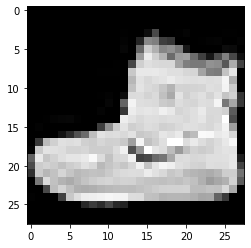

In [0]:
plt.imshow(image.squeeze(), cmap = 'gray') # we squeeze off the color channel axis
print('label', label)

In [0]:
# looking at batches instead
batch = next(iter(train_loader))
len(batch)

2

In [0]:
type(batch)

list

In [0]:
images, labels = batch

In [0]:
images.shape
#rank 4 tensors, 10 images, 1 single color channel, height 28 and width 28

torch.Size([10, 1, 28, 28])

In [0]:
labels.shape
# rank 1 tensor, single axis, length of 10

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


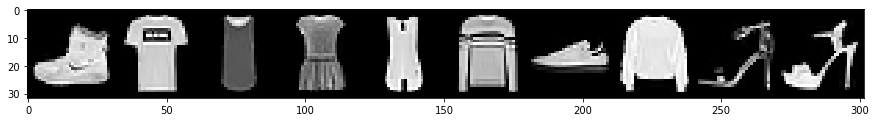

In [0]:
#plot 10 images at once using make_grid
#data loader output 4-dim tensor [B, C, H, W]
# matplolib and other image processing lib often requires [heigh, width, channel]
grid = torchvision.utils.make_grid(images, nrow=10) #nrow is the number of images displayed for each row
# grid is a tensor with shape [3,32,302], 3 is size of color channel axis, 32 is height, 302 is width, 10x28 + 11x2(default paddling) 

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)), cmap = 'gray') # transpose [C, H, W] tensor to [H, W, C] for matplotlib to plot

print('labels:', labels)

In [0]:
grid.shape

torch.Size([3, 32, 302])

#Build the model

In [0]:
# OOP review
# attribute and methods
class Lizard:
  def __init__(self,name):
    self.name = name

  def set_name(self,name):
    self.name = name

In [0]:
lizard = Lizard('deep')
print(lizard.name)

deep


In [0]:
lizard.set_name('lizard')
print(lizard.name)

lizard


## 3 pieces to build a neural network


1.   Extend the nn.Module base classes
2.   Define layers as class attributes
3.   Implement the forward() method

In [0]:
import torch.nn as nn

In [0]:
#extending pytorch nn.Module base class
#with this, we now have a network class that has all of the functionality of the pytorch nn.module class
# underneath the hood, the module base class is keeping track of each layer's weights, which are contained within each layer
class Network(nn.Module): #Line 1 
  def __init__(self):
    super(Network, self).__init__() #Line 2
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size =5)

    self.fc1 = nn.Linear(in_features = 12*4*4, out_features = 120)
    self.fc2 = nn.Linear(in_features = 120, out_features =60)
    self.out = nn.Linear(in_features=60, out_features =10)

  def forward(self,t):
    t = self.layer(t)
    return t

In [0]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

##Two types of parameters:
1.   Hyperparameters: parameters whose values are chosen manually and arbitrarily. Utilize values that have proven to work in the past.

*   kernel_size: set the filter size
*   out_channels: set the numbser of filters. one filter produces one output channel. feature maps
*   out_features: set the size of output tensor

2.   Data dependent hyperparameters: parameters whose value depend on the data


*   start of the network, in_channels, depneds on the number of color channels present inside the images that make up the training set, greyscale image is 1
*   end of the network, out_features, depends on the number of classes that are present inside our training set

When we go from a conv layer to linear layer, we need to flatten our tensors. 12 * 4 * 4.

*   12 is the number of out_channels from previous conv layer
*   4 * 4: is the image size from conv filter: 
Output size of conv = [(inputSize + 2*pad - filterSize)/Stride] + 1




3.   Learnable parameters are parameters whose values are learned during the training process. we often start with arbitrary values, and these values get updated in iterative fashion
2.   List item





In [0]:
print(network)


Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [0]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [0]:
network.fc1

Linear(in_features=192, out_features=120, bias=True)

In [0]:
network.conv1.weight #.conv1 access conv1 object that lives inside network object, then access weight object that lives inside conv1 object

Parameter containing:
tensor([[[[-0.1335, -0.1132, -0.1319,  0.0399,  0.1188],
          [ 0.0284, -0.1615,  0.0306,  0.0071,  0.0743],
          [-0.0830,  0.1640,  0.0811, -0.0093, -0.1455],
          [ 0.1109,  0.1183,  0.1308, -0.1742, -0.0015],
          [ 0.0561, -0.1254, -0.0449,  0.1304,  0.0478]]],


        [[[ 0.0839,  0.0100, -0.0707, -0.1168,  0.1079],
          [ 0.1984,  0.1186,  0.0527, -0.1148,  0.1970],
          [-0.0457, -0.1598, -0.1473, -0.1280,  0.1138],
          [-0.0701,  0.1295, -0.0166, -0.1089,  0.0864],
          [-0.0094,  0.0099, -0.0055, -0.0675,  0.0802]]],


        [[[ 0.1226, -0.0590,  0.1733,  0.0718, -0.0786],
          [-0.0948, -0.0286,  0.0487, -0.0157,  0.1377],
          [-0.1673,  0.1589,  0.0221,  0.1421, -0.0127],
          [-0.0906, -0.1391,  0.1524, -0.1370,  0.1926],
          [-0.0668, -0.0547,  0.0080,  0.1199, -0.1629]]],


        [[[-0.1650,  0.1874, -0.1927,  0.0776,  0.1175],
          [ 0.0630, -0.0262,  0.0368,  0.0890,  0.0494

##Weight tensor shape for a conv layer, a single tensor, each filter also has a depth that accounts for the input channels that are being. Rank 4 tensors:
1.   The number of filters
2.   The depth of filters which corresponds to the number of input channels being involved (color channels for the first conv layer)
3.   height of filter
4.   width of filter

##Weight tensor shape for a linear layer is a rank two tensor commonly called a weight matrix




In [0]:
network.conv1.weight.shape
#6 filters, 1 input channel, 5x5 is the filter size

torch.Size([6, 1, 5, 5])

In [0]:
network.conv2.weight.shape
# 12 filters, 6 input channels

torch.Size([12, 6, 5, 5])

In [0]:
network.fc1.weight.shape

torch.Size([120, 192])

In [0]:
network.fc2.weight.shape

torch.Size([60, 120])

In [0]:
network.out.weight.shape

torch.Size([10, 60])

In [0]:
# access all weights in a nn
for name, param in network.named_parameters():
  print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


#Linear Layer in depth

In [0]:
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)
weight_matrix = torch.tensor([
                              [1,2,3,4],
                              [2,3,4,5],
                              [3,4,5,6]
], dtype = torch.float32)

In [0]:
weight_matrix.matmul(in_features)

tensor([30., 40., 50.])

In [0]:
fc = nn.Linear(in_features = 4, out_features =3)

In [0]:
fc(in_features)

tensor([ 0.5920, -4.3398, -1.0574], grad_fn=<AddBackward0>)

In [0]:
#change the weight matrix
fc.weight = nn.Parameter(weight_matrix)
fc(in_features) #notice the output is not exactly the same as above, this is because we have default bias setting

tensor([30.4503, 39.8092, 50.4408], grad_fn=<AddBackward0>)

In [0]:
fc = nn.Linear(in_features=4, out_features=3, bias = False)
fc.weight = nn.Parameter(weight_matrix)
fc(in_features)

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

#CNN forward method - PyTorch Deep Learning Implementation
##pass a single image to NN to predict

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:

class Network(nn.Module): #Line 1 
  def __init__(self):
    super(Network, self).__init__() #Line 2
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size =5)

    self.fc1 = nn.Linear(in_features = 12*4*4, out_features = 120)
    self.fc2 = nn.Linear(in_features = 120, out_features =60)
    self.out = nn.Linear(in_features=60, out_features =10)

  def forward(self,t):
    # (1) input layer
    t = t

    # (2) hidden conv layer
    t = self.conv1(t)
    t = F.relu(t) #direct operation, not a layer hence no weight, hence it's called from F., similiar for max_pool2d
    t = F.max_pool2d(t, kernel_size =2, stride =2) 

    # (3) hidden conv layer
    t = self.conv2(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride =2)

    # (4) hidden linear layer
    t = t.reshape(-1, 12*4*4) # 12 channels, height 4, and width 4, tensor needs to be flattened before passing to a linear layer 
    t = self.fc1(t)
    t = F.relu(t)

    # (5) hidden linear layer
    t = self.fc2(t)
    t = F.relu(t)

    # (6) output layer
    t = self.out(t)
    #t = F.softmax(t, dim=1), softmax function returns a positive possiblity for each classfication class
    
    return t

In [8]:
torch.set_grad_enabled(False) # turn off the auto-gradient, this is needed during actual training, for our example below, we don't need

In [0]:
network = Network()

In [0]:
sample = next(iter(train_set))

In [12]:
image, label = sample
print(image.shape)
print("\n")
print(label)

torch.Size([1, 28, 28])


9


In [0]:
#input tensor for a neural network is required to be a rank 4 tensor with shape [batch_size, in_channels, height, widt]
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [0]:
pred = network(image.unsqueeze(0))

In [14]:
pred.shape

torch.Size([1, 10])

In [0]:
pred

tensor([[-0.1106,  0.0304,  0.1373, -0.1155, -0.0140,  0.0264,  0.0135, -0.0675, -0.1362,  0.1429]])

In [0]:
label

9

In [0]:
pred.argmax(dim=1)

tensor([9])

In [0]:
F.softmax(pred, dim=1)

tensor([[0.0900, 0.1036, 0.1153, 0.0895, 0.0991, 0.1032, 0.1019, 0.0939, 0.0877, 0.1159]])

In [0]:
F.softmax(pred, dim =1).sum()

tensor(1.0000)

#NN batch processing - pass image batch to pytorch CNN

In [0]:
batch = next(iter(train_loader))
images, labels = batch

In [0]:
images.shape

torch.Size([10, 1, 28, 28])

In [0]:
labels.shape

torch.Size([10])

In [0]:
preds = network(images)
preds.shape

torch.Size([10, 10])

In [0]:
preds #we have 10 images, for each image, we have 10 prediction classes

tensor([[-0.1106,  0.0304,  0.1373, -0.1155, -0.0140,  0.0264,  0.0135, -0.0675, -0.1362,  0.1429],
        [-0.1082,  0.0308,  0.1377, -0.1126, -0.0113,  0.0311, -0.0031, -0.0686, -0.1500,  0.1419],
        [-0.1064,  0.0258,  0.1378, -0.1045, -0.0266,  0.0309,  0.0123, -0.0773, -0.1332,  0.1394],
        [-0.1040,  0.0275,  0.1385, -0.1102, -0.0222,  0.0291,  0.0099, -0.0724, -0.1408,  0.1435],
        [-0.1076,  0.0311,  0.1419, -0.1148, -0.0171,  0.0181,  0.0044, -0.0616, -0.1414,  0.1411],
        [-0.1110,  0.0331,  0.1421, -0.1143, -0.0161,  0.0308,  0.0015, -0.0650, -0.1370,  0.1462],
        [-0.1040,  0.0291,  0.1385, -0.1139, -0.0153,  0.0333,  0.0092, -0.0672, -0.1311,  0.1391],
        [-0.1100,  0.0361,  0.1431, -0.1171, -0.0124,  0.0244,  0.0057, -0.0618, -0.1323,  0.1482],
        [-0.0970,  0.0204,  0.1503, -0.1050, -0.0204,  0.0318,  0.0199, -0.0755, -0.1367,  0.1403],
        [-0.1018,  0.0250,  0.1542, -0.1098, -0.0135,  0.0407,  0.0193, -0.0677, -0.1382,  0.1470]])

In [0]:
preds.argmax(dim=1)

tensor([9, 9, 9, 9, 2, 9, 9, 9, 2, 2])

In [0]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [0]:
preds.argmax(dim=1).eq(labels) #compare the predictions with the labels

tensor([ True, False, False, False, False, False, False, False, False, False])

In [0]:
preds.argmax(dim=1).eq(labels).sum()

tensor(1)

In [0]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [0]:
get_num_correct(preds, labels)

1

#CNN output size formula (Square)

*   Suppose we have nxn input
*   Suppose we have fxf filter
*   Suppose we have a padding of p and a stride of s

The output size O is given by this formula:
O = (n - f + 2p)/s + 1
This is true for conv, max pooling layers

## CNN output size formula for non-square 

Refer to link: https://deeplizard.com/learn/video/cin4YcGBh3Q



#CNN training with code example

##The training process:
1.   Get batch from the training set
2.   Pass batch to network
3.   Calculate the loss (difference between the predicted values and true values)
4.   Calculate the gradient of the loss function w.r.t the network's weights
5.   Update the weights using the gradients to reduce the loss
6.   repeat steps 1-5 until one epoch is completed
7.   Repeat steps 1-6 as many epochs required to obtain the desired level of accuracy



In [0]:
torch.set_grad_enabled(True)

In [0]:
import torch.optim as optim

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch

##Calculate the Loss

In [0]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item() #get the numerical values

2.305128335952759

##Calculate the gradients

In [0]:
print(network.conv1.weight.grad)

None


In [0]:
loss.backward() #calculate the gradients, same shape as the weight tensor

In [0]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

##Updating the weights

In [0]:
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [0]:
loss.item()

2.305128335952759

In [0]:
get_num_correct(preds, labels)

8

In [0]:
optimizer.step() # updating the weights, we want to step in the direction of the loss functions minimum

In [0]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [0]:
loss.item() # a lower loss

2.263906478881836

In [0]:
get_num_correct(preds, labels) # number of correct predictions goes up

18

##Training with single batch

In [0]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # get batch
images, labels = batch #unpacking to images and labels tensor

preds = network(images) # pass batch
loss = F.cross_entropy(preds, labels) # calculate loss

loss.backward() # calculate gradietns
optimizer.step() # update weights


print('loss1: ', loss.item())
preds = network(images)
loss= F.cross_entropy(preds, labels)
print('loss2', loss.item())

loss1:  2.2967464923858643
loss2 2.281451463699341


#CNN training loop

##Training with one epoch

In [0]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100) #batch_size is 100, and hence we have 600 batches, and we are updating weights
#600 times; 
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss =0
total_correct =0
for batch in train_loader:
  images, labels = batch

  preds = network(images) # pass batch, images shape is [100,1,28,28], labels shape is [100]
  #preds shape is [100,10]
  loss = F.cross_entropy(preds, labels) # calculate loss

  optimizer.zero_grad() #zero out the gradients that are being held in the grad attribute of the weights, pytorch accumulates gradients (adds), it 
  # add current new gradient to existing one; need to ensure we zero out gradients before we calculate any new gradients
  loss.backward() # calculate gradietns
  optimizer.step() # update weights

  total_loss +=loss.item()
  total_correct += get_num_correct(preds, labels)

print('epoch: ', 0, "total_correct: ", total_correct, "loss: ", total_loss)

epoch:  0 total_correct:  47009 loss:  344.23468862473965


In [0]:
total_correct/len(train_set)

0.7834833333333333

##Training with multiple epochs: the complete training loop

In [0]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100) #batch_size is 100, and hence we have 600 batches, and we are updating weights
#600 times; 
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(5):
  total_loss =0
  total_correct =0

  for batch in train_loader:
    images, labels = batch

    preds = network(images) # pass batch, images shape is [100,1,28,28], labels shape is [100]
    #preds shape is [100,10]
    loss = F.cross_entropy(preds, labels) # calculate loss

    optimizer.zero_grad() #zero out the gradients that are being held in the grad attribute of the weights, pytorch accumulates gradients (adds), it 
    # add current new gradient to existing one; need to ensure we zero out gradients before we calculate any new gradients
    loss.backward() # calculate gradietns
    optimizer.step() # update weights

    total_loss +=loss.item()
    total_correct += get_num_correct(preds, labels)

  print('epoch: ', epoch, "total_correct: ", total_correct, "loss: ", total_loss)

epoch:  0 total_correct:  47493 loss:  328.05604046583176
epoch:  1 total_correct:  51566 loss:  228.40662117302418
epoch:  2 total_correct:  52231 loss:  209.27592954039574
epoch:  3 total_correct:  52505 loss:  200.3431894481182
epoch:  4 total_correct:  52788 loss:  195.45161175727844


In [0]:
total_correct/len(train_set)

0.8798

#CNN confusion matrix with pytorch

In [0]:
len(train_set)

60000

In [0]:
len(train_set.targets)

60000

##Getting predictions for the entire training set

In [0]:
def get_all_preds(model, loader): # we pass a dataloader instead of entire training datasets, because machine cannot handle that much computation all at once
  all_preds = torch.tensor([])
  for batch in loader:
    images, labels = batch

    preds = model(images)
    all_preds = torch.cat((all_preds, preds), dim=0)

  return all_preds

In [0]:
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size = 10000)
train_preds = get_all_preds(network, prediction_loader)

In [0]:
train_preds.shape # total 60000 images, for each image, we are given 10 values for each category, the category with the highest prediciton value 
# is the one the network is predicting most strongly

torch.Size([60000, 10])

In [0]:
print(train_preds.requires_grad) # requires gradient tracking feature

True


In [0]:
train_preds.grad # we have not done any back propagation and hence no values have been given to the gradients

In [0]:
train_preds.grad_fn # the graph is being tracked

In [0]:
with torch.no_grad(): #turning off gradient tracking locally
  prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
  train_preds = get_all_preds(network, prediction_loader)

In [0]:
print(train_preds.requires_grad)

False


In [0]:
train_preds.grad

In [0]:
train_preds.grad_fn #nothing returned

In [0]:
preds_correct = get_num_correct(train_preds, train_set.targets)

print('total correct: ', preds_correct)
print('accuracy: ', preds_correct/len(train_set))

total correct:  52768
accuracy:  0.8794666666666666


##Building a confusion matrix

In [0]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [0]:
train_preds.argmax(dim=1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [0]:
# pair up target labels and prediction labels
stacked = torch.stack(
    (
        train_set.targets, train_preds.argmax(dim=1)
    ), dim = 1
)

In [0]:
stacked.shape

torch.Size([60000, 2])

In [0]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [0]:
stacked[0].tolist()

[9, 9]

In [0]:
cmt = torch.zeros(10,10, dtype=torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [0]:
for p in stacked:
  j, k =p.tolist()
  cmt[j,k] = cmt[j,k]+1

In [0]:
cmt

tensor([[5587,   25,   67,  110,   13,    3,  139,    0,   56,    0],
        [   5, 5886,    1,   89,    1,    1,    8,    0,    9,    0],
        [  96,    2, 5026,   53,  499,    2,  264,    0,   58,    0],
        [ 274,   58,   17, 5403,  164,    0,   67,    0,   17,    0],
        [  15,    7,  566,  241, 4626,    0,  468,    1,   76,    0],
        [   7,    0,    0,    0,    0, 5585,    0,  259,   33,  116],
        [1549,   14,  583,  128,  385,    1, 3177,    2,  161,    0],
        [   0,    0,    0,    0,    0,    9,    0, 5755,   18,  218],
        [  12,    5,   16,   20,   15,    6,   13,    9, 5886,   18],
        [   0,    0,    0,    0,    0,    9,    0,  152,    2, 5837]])

##Plotting a confusion matrix

In [0]:
cmt_pd = pd.DataFrame(cmt.numpy())
cmt_pd

,0,1,2,3,4,5,6,7,8,9
0,5587,25,67,110,13,3,139,0,56,0
1,5,5886,1,89,1,1,8,0,9,0
2,96,2,5026,53,499,2,264,0,58,0
3,274,58,17,5403,164,0,67,0,17,0
4,15,7,566,241,4626,0,468,1,76,0
5,7,0,0,0,0,5585,0,259,33,116
6,1549,14,583,128,385,1,3177,2,161,0
7,0,0,0,0,0,9,0,5755,18,218
8,12,5,16,20,15,6,13,9,5886,18
9,0,0,0,0,0,9,0,152,2,5837


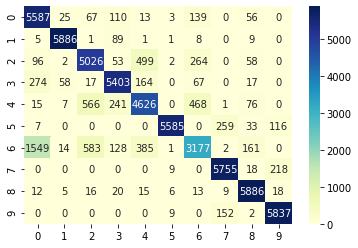

In [0]:
import seaborn as sns
sns.heatmap(cmt_pd, annot = True, fmt="d", cmap="YlGnBu")

#Stack vs Concat in Pytorch

*   Concatenating joins a sequence of tensors along an existing axis
*   Stacking joins a sequence of tensors along a new axis



In [0]:
t1 = torch.tensor([1,1,1]) # create a rank 1 tensor

In [0]:
t1.unsqueeze(dim=0) # add a dimension at dim = 0, a new tensor with shape 1x3, we have a rank 2 tensor

tensor([[1, 1, 1]])

In [0]:
t1.unsqueeze(dim = 1) # add a dim at dim=1, a new tensor with shape 3x1

tensor([[1],
        [1],
        [1]])

In [0]:
print(t1.shape)
print(t1.unsqueeze(dim=0).shape)
print(t1.unsqueeze(dim=1).shape)

torch.Size([3])
torch.Size([1, 3])
torch.Size([3, 1])


##PyTorch: stack vs cat

In [0]:
# 3 tensors with single axis
t1 = torch.tensor([1,1,1])
t2 = torch.tensor([2,2,2])
t3 = torch.tensor([3,3,3])

In [0]:
torch.cat((t1,t2,t3), dim = 0) #concatenate happens for the single existing axis

tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [0]:
torch.stack((t1,t2,t3), dim=0) # a new tensor with shape 3x3

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

In [0]:
# add a new axis to each tensor, and concatenate them along the new axis
torch.cat(
    (
        t1.unsqueeze(0), t2.unsqueeze(0), t3.unsqueeze(0)
    ), dim = 0
)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

In [0]:
torch.stack((t1,t2,t3), dim=1) # a new tensor with shape 3x3

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [0]:
torch.cat(
    (
        t1.unsqueeze(1), t2.unsqueeze(1), t3.unsqueeze(1)
    ), dim=1
)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

#TensorBoard with PyTorch

In [0]:
from torch.utils.tensorboard import SummaryWriter

In [0]:
!tensorboard --version

1.15.0


In [0]:
writer = SummaryWriter('logs/expt1')

In [0]:
!ls

data  logs  sample_data


In [0]:
dir(torchvision.models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'Inception3',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

In [3]:
from torchvision import models
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [8]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [5]:
for name, param in model.named_parameters():
  print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([64, 3, 7, 7])
bn1.weight 		 torch.Size([64])
bn1.bias 		 torch.Size([64])
layer1.0.conv1.weight 		 torch.Size([64, 64, 1, 1])
layer1.0.bn1.weight 		 torch.Size([64])
layer1.0.bn1.bias 		 torch.Size([64])
layer1.0.conv2.weight 		 torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight 		 torch.Size([64])
layer1.0.bn2.bias 		 torch.Size([64])
layer1.0.conv3.weight 		 torch.Size([256, 64, 1, 1])
layer1.0.bn3.weight 		 torch.Size([256])
layer1.0.bn3.bias 		 torch.Size([256])
layer1.0.downsample.0.weight 		 torch.Size([256, 64, 1, 1])
layer1.0.downsample.1.weight 		 torch.Size([256])
layer1.0.downsample.1.bias 		 torch.Size([256])
layer1.1.conv1.weight 		 torch.Size([64, 256, 1, 1])
layer1.1.bn1.weight 		 torch.Size([64])
layer1.1.bn1.bias 		 torch.Size([64])
layer1.1.conv2.weight 		 torch.Size([64, 64, 3, 3])
layer1.1.bn2.weight 		 torch.Size([64])
layer1.1.bn2.bias 		 torch.Size([64])
layer1.1.conv3.weight 		 torch.Size([256, 64, 1, 1])
layer1.1.bn3.weight 		 torch.Size

In [9]:
!pip install efficientnet_pytorch torchtoolbox

     |████████████████████████████████| 61kB 2.7MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12422 sha256=bae9b5a3db2aca0379e7a6025f3ad1e7ff166365deefc6fd561691d56aed478b
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
Successfully built efficientnet-pytorch
